# Task 2: SMS-spam Classifier

# Handling missing values,Data Cleaning

In [2]:
import numpy as np
import pandas as pd

In [3]:
#list of possible encodings to try
import pandas as pd

encodings = ['utf-8','latin1','ISO-8859','cp1252']

file_path ='spam.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File succesfully read with encoding: {encoding}")
        break 
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue
        
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encodings attempts failed.Unable to read the CSV file.")
    

Failed to read with encoding: utf-8
File succesfully read with encoding: latin1
CSV file has been successfully loaded.


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1828,ham,May i call You later Pls,NaN,NaN,NaN
5174,ham,Water logging in desert. Geoenvironmental impl...,NaN,NaN,NaN
4444,ham,"2 celebrate my båÕday, y else?",NaN,NaN,NaN
701,ham,"Sorry, I'll call later",NaN,NaN,NaN
4632,ham,Oh wow thats gay. Will firmware update help,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#PROCESS 
#1.Data cleaning
#2.EDA
#3.Text Preprocessing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

In [7]:
#1. DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
4923,ham,We can go 4 e normal pilates after our intro...
1113,ham,"No I'm good for the movie, is it ok if I leave..."
2657,ham,Dai &lt;#&gt; naal eruku.
3737,ham,We stopped to get ice cream and will go back a...
140,ham,"K, text me when you're on the way"


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1950,ham,Oh ic. I thought you meant mary jane.
1753,ham,Jus came back fr lunch wif my sis only. U leh?
5047,ham,Yeah so basically any time next week you can g...
464,ham,Ok i am on the way to railway
553,ham,Ok. Every night take a warm bath drink a cup o...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

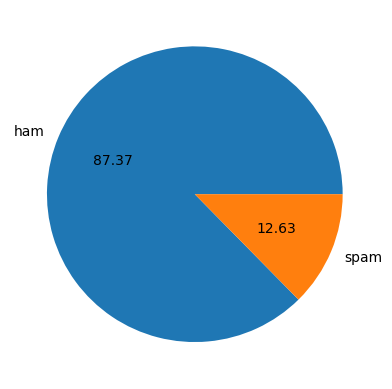

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gyanada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters']= df['text'].apply(len) 

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#targetting ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#targetting spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

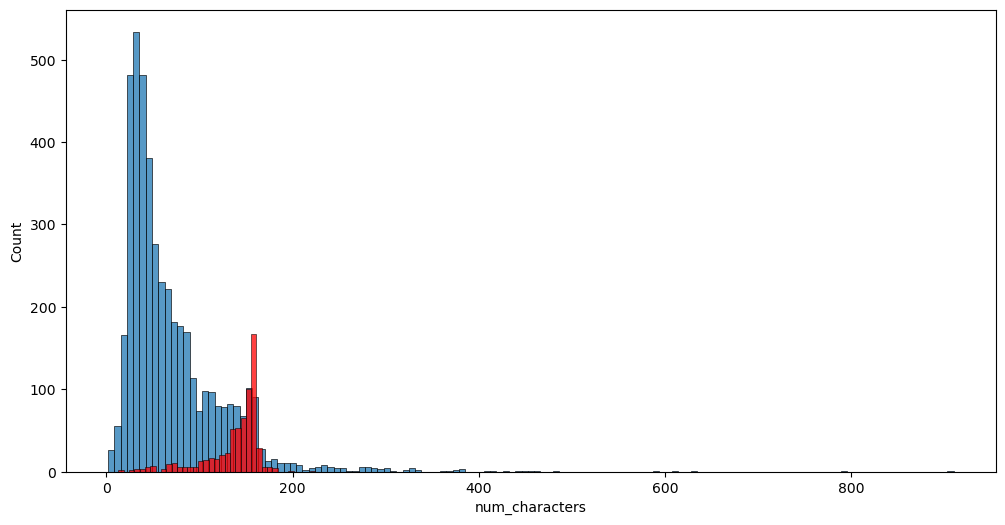

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

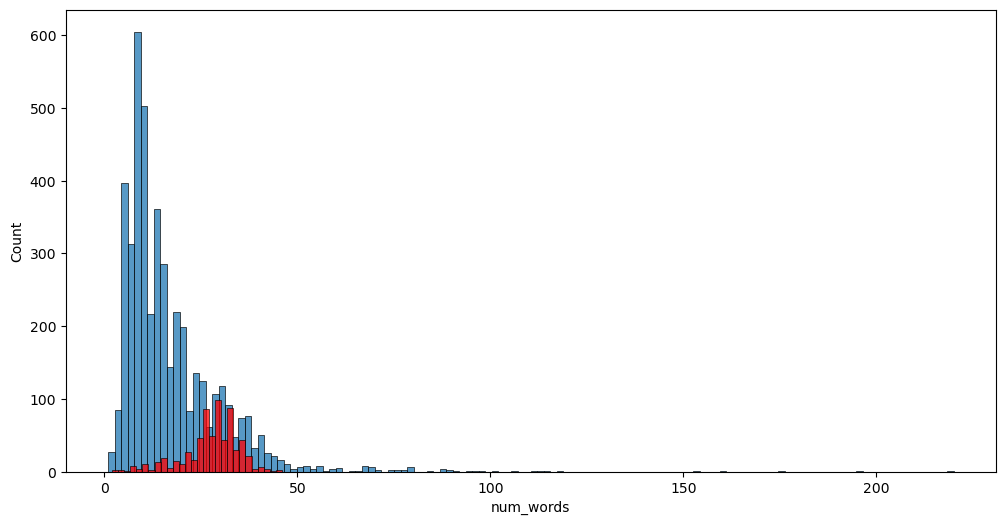

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'],color='red')

C:\Users\gyanada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


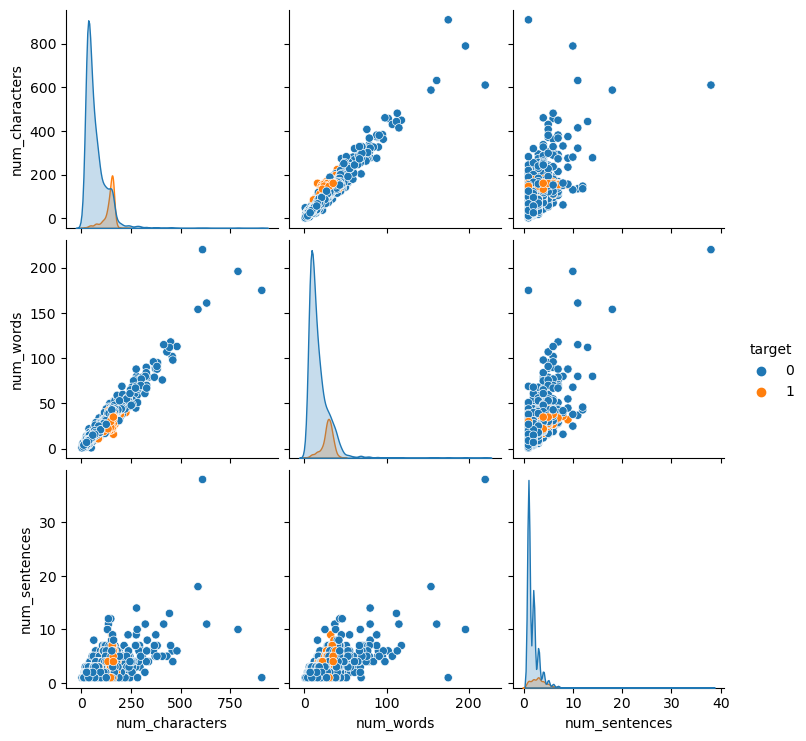

In [38]:
sns.pairplot(df,hue='target')

<Axes: >

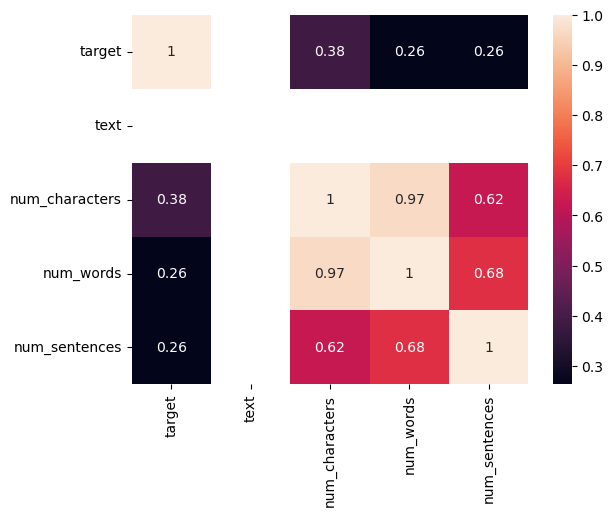

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Convert non-numeric values to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
sns.heatmap(df_numeric.corr(), annot=True)


# DATA PREPROCESSING

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gyanada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

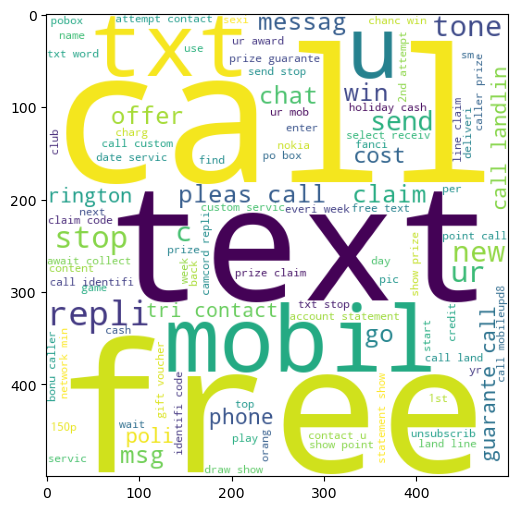

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

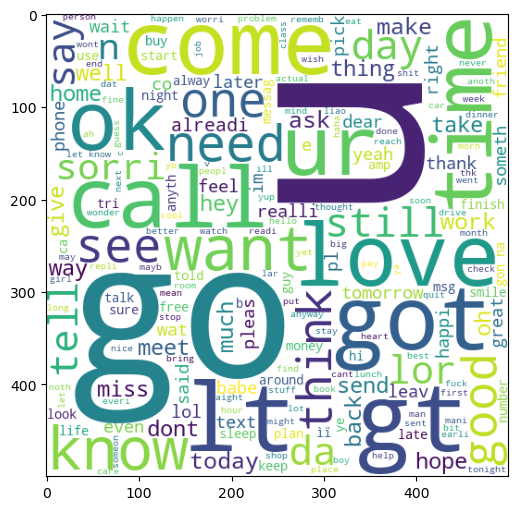

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


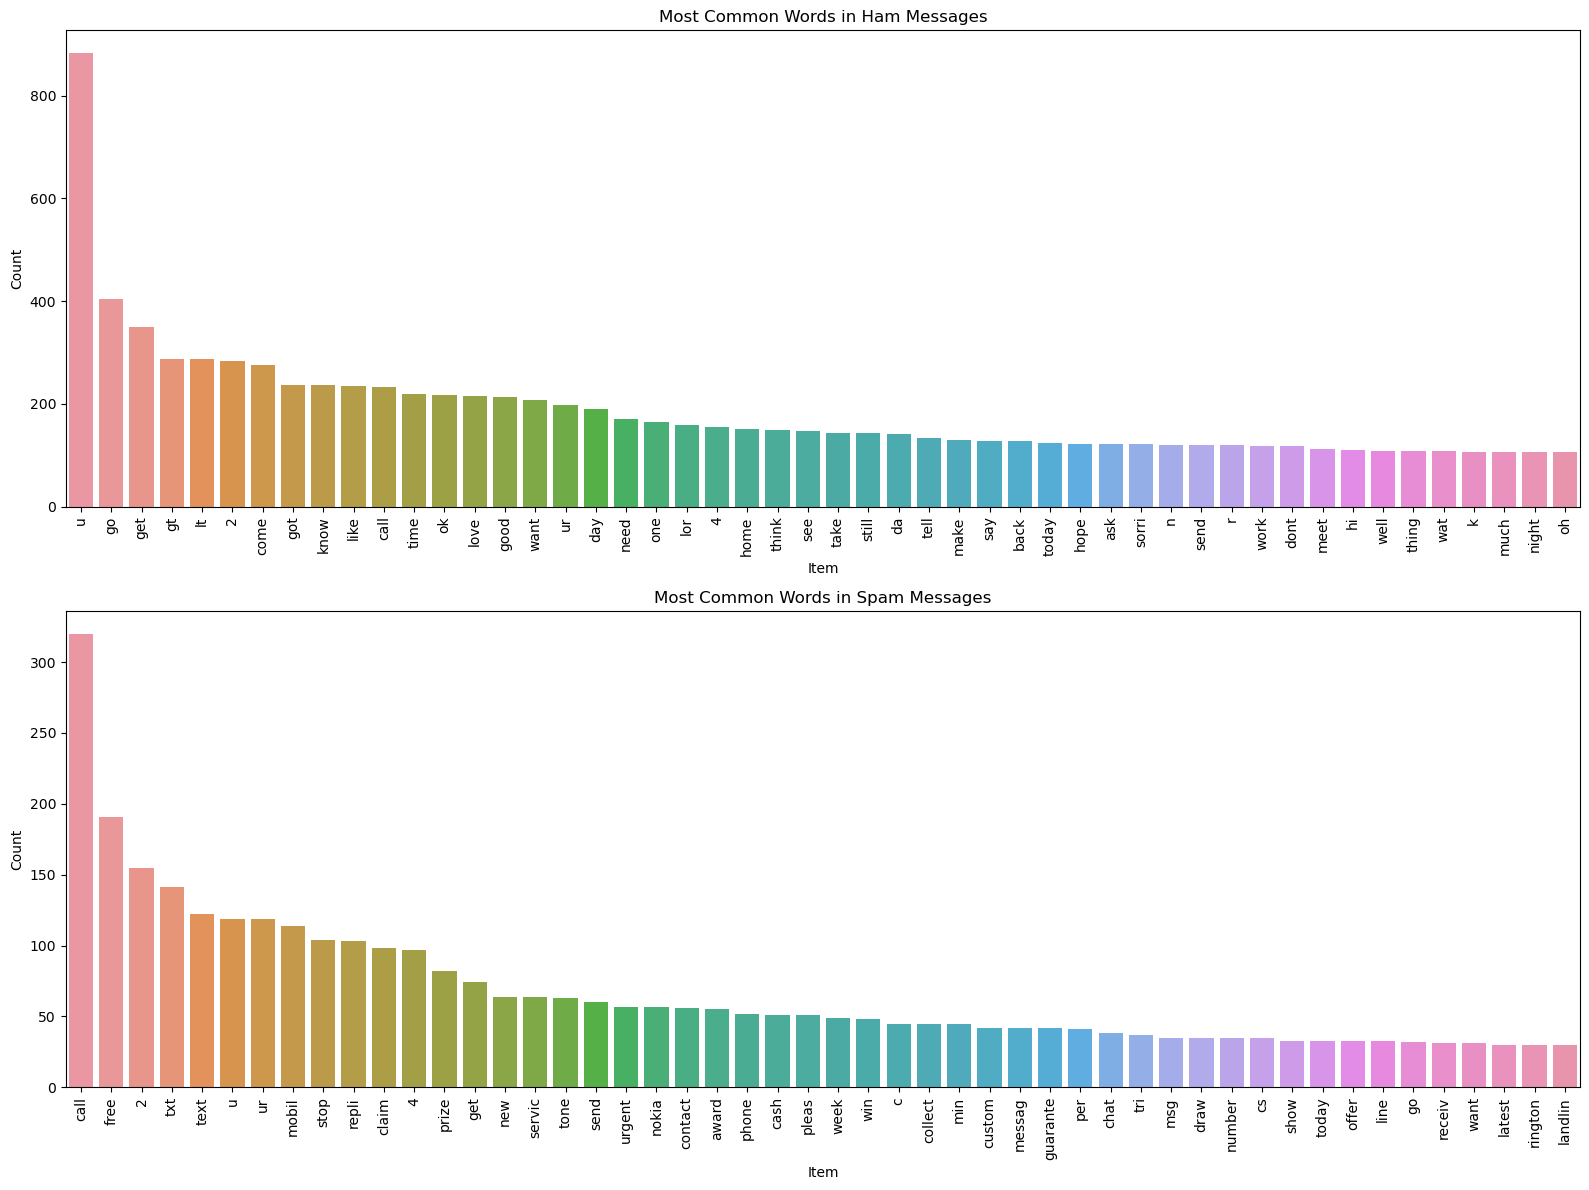

DataFrame for Ham Messages:
     Item  Count
0       u    883
1      go    404
2     get    349
3      gt    288
4      lt    287
5       2    284
6    come    275
7     got    236
8    know    236
9    like    234
10   call    233
11   time    219
12     ok    217
13   love    216
14   good    213
15   want    208
16     ur    197
17    day    190
18   need    170
19    one    165
20    lor    159
21      4    156
22   home    152
23  think    149
24    see    147
25   take    143
26  still    143
27     da    142
28   tell    133
29   make    129
30    say    127
31   back    127
32  today    123
33   hope    122
34    ask    121
35  sorri    121
36      n    120
37   send    120
38      r    120
39   work    118
40   dont    118
41   meet    112
42     hi    111
43   well    109
44  thing    109
45    wat    108
46      k    107
47   much    107
48  night    107
49     oh    106

DataFrame for Spam Messages:
        Item  Count
0       call    320
1       free    191
2          2   

In [105]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'transformed_text' is the column containing the text data for ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Counter for ham_corpus
ham_counter = Counter(ham_corpus)

# Get the most common items for ham
ham_common_items = ham_counter.most_common(50)
df_ham_common = pd.DataFrame(ham_common_items, columns=['Item', 'Count'])

# Assuming 'transformed_text' is the column containing the text data for spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Counter for spam_corpus
spam_counter = Counter(spam_corpus)

# Get the most common items for spam
spam_common_items = spam_counter.most_common(50)
df_spam_common = pd.DataFrame(spam_common_items, columns=['Item', 'Count'])

# Plotting
plt.figure(figsize=(16, 12))

# Plotting the barplot for ham
plt.subplot(2, 1, 1)
sns.barplot(x='Item', y='Count', data=df_ham_common)
plt.title('Most Common Words in Ham Messages')
plt.xticks(rotation='vertical')

# Plotting the barplot for spam
plt.subplot(2, 1, 2)
sns.barplot(x='Item', y='Count', data=df_spam_common)
plt.title('Most Common Words in Spam Messages')
plt.xticks(rotation='vertical')

plt.tight_layout()

# Display the plot
plt.show()

# Retain the dataframes with the original columns
print("DataFrame for Ham Messages:")
print(df_ham_common)

print("\nDataFrame for Spam Messages:")
print(df_spam_common)


In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(5169, 3000)

In [56]:
y = df['target'].values

In [57]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4, random_state=89)

In [64]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))

Gaussian Naive Bayes:
Accuracy: 0.8641199226305609
Confusion Matrix:
 [[1578  234]
 [  47  209]]
Precision Score: 0.4717832957110609


In [67]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))



Multinomial Naive Bayes:
Accuracy: 0.9690522243713733
Confusion Matrix:
 [[1812    0]
 [  64  192]]
Precision Score: 1.0


In [68]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("\nBernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision Score:", precision_score(y_test, y_pred3))


Bernoulli Naive Bayes:
Accuracy: 0.9782398452611218
Confusion Matrix:
 [[1812    0]
 [  45  211]]
Precision Score: 1.0


In [69]:
!pip install xgboost

In [70]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
mnb = MultinomialNB()
svc = SVC()
lrc = LogisticRegression(solver = 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimators =50, random_state=2)

In [72]:
clfs = {
    'SVC': svc,
    'MultinomialNB': mnb,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'DecisionTreeClassifier': dtc,
    'KNeighborsClassifier': knc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier': gdbt,
    'XGBClassifier': xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9724371373307543, 0.9853658536585366)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy =  0.9724371373307543
Precision =  0.9853658536585366
For MultinomialNB
Accuracy =  0.9690522243713733
Precision =  1.0
For LogisticRegression
Accuracy =  0.9516441005802708
Precision =  0.9148936170212766
For RandomForestClassifier
Accuracy =  0.9709864603481625
Precision =  0.9711538461538461
For AdaBoostClassifier
Accuracy =  0.9656673114119922
Precision =  0.9302325581395349
For BaggingClassifier
Accuracy =  0.9593810444874274
Precision =  0.8495934959349594
For DecisionTreeClassifier
Accuracy =  0.938588007736944
Precision =  0.8524590163934426
For KNeighborsClassifier
Accuracy =  0.90715667311412
Precision =  1.0
For ExtraTreesClassifier
Accuracy =  0.971953578336557
Precision =  0.9583333333333334
For GradientBoostingClassifier
Accuracy =  0.9555125725338491
Precision =  0.9361702127659575
For XGBClassifier
Accuracy =  0.9656673114119922
Precision =  0.9147982062780269


In [76]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972437,0.985366
8,ExtraTreesClassifier,0.971954,0.958333
3,RandomForestClassifier,0.970986,0.971154
1,MultinomialNB,0.969052,1.000000
4,AdaBoostClassifier,0.965667,0.930233
10,XGBClassifier,0.965667,0.914798
5,BaggingClassifier,0.959381,0.849593
9,GradientBoostingClassifier,0.955513,0.936170
2,LogisticRegression,0.951644,0.914894
6,DecisionTreeClassifier,0.938588,0.852459


In [78]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [79]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972437
1,ExtraTreesClassifier,Accuracy,0.971954
2,RandomForestClassifier,Accuracy,0.970986
3,MultinomialNB,Accuracy,0.969052
4,AdaBoostClassifier,Accuracy,0.965667
5,XGBClassifier,Accuracy,0.965667
6,BaggingClassifier,Accuracy,0.959381
7,GradientBoostingClassifier,Accuracy,0.955513
8,LogisticRegression,Accuracy,0.951644
9,DecisionTreeClassifier,Accuracy,0.938588


C:\Users\gyanada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


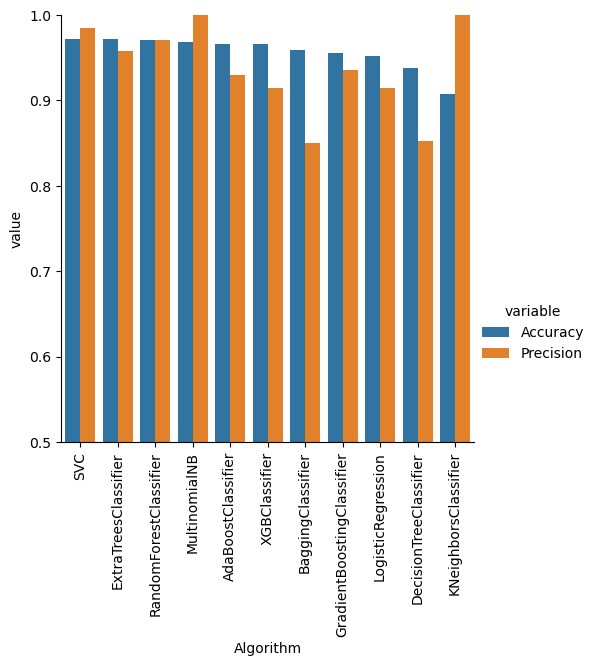

In [80]:
sns.catplot(x='Algorithm',y='value',
           hue ='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000')

In [82]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [83]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [84]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_charas':accuracy_scores,'Precision_num_scores':precision_scores}).sort_values('Precision_num_scores')

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [85]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier


In [86]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('SVC', svc),
    ('MultinomialNB', mnb),
    ('ExtraTreesClassifier', etc)
], voting='soft')


In [87]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MultinomialNB', MultinomialNB()),
                             ('ExtraTreesClassifier',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9811411992263056
Precision 0.9822222222222222


In [89]:
estimators=[('SVC', svc),
    ('MultinomialNB', mnb),
    ('ExtraTreesClassifier', etc)]

final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [92]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9821083172147002
Precision 0.9659574468085106


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train_str = [str(x) for x in X_train]

y_train_encoded = [1 if label == 'spam' else 0 for label in y_train]
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_str, y_train_encoded, test_size=0.2, random_state=2)
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train_split)
classifier = RandomForestClassifier(n_estimators=50, random_state=2)
classifier.fit(X_train_transformed, y_train_split)
user_input = input("Enter the text: ")
input_transformed = vectorizer.transform([user_input])

# Use the trained classifier to predict
prediction = classifier.predict(input_transformed)

print("Input Text:", user_input)
print("Transformed Input:", input_transformed)
print("Vectorizer Vocabulary:", vectorizer.vocabulary_)
print("Vectorizer IDF Values:", vectorizer.idf_)

print("Prediction:", prediction)

if prediction == 1:
    print("This is a spam message.")
elif prediction == 0:
    print("This is a ham (non-spam) message.")
else:
    print("Invalid prediction value:", prediction)



Enter the text: Is that seriously how you spell his name?			
Input Text: Is that seriously how you spell his name?			
Transformed Input: 
Vectorizer Vocabulary: {'22830555': 1, '35561798': 16, '63973749': 32, '30684515': 7, '31694279': 9, '33007057': 11, '23587324': 2, '35266917': 15, '38231371': 20, '27097536': 4, '25725833': 3, '34491987': 14, '50029322': 27, '52110128': 28, '27419067': 5, '40219268': 22, '37632928': 18, '33898269': 12, '5319238': 30, '38143721': 19, '31044312': 8, '3440481': 13, '20149162': 0, '32601174': 10, '45444354': 24, '46563793': 26, '36197408': 17, '5242059': 29, '38690139': 21, '71661647': 33, '45683376': 25, '55774013': 31, '43332757': 23, '30122926': 6}
Vectorizer IDF Values: [8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698
 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698
 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698
 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698 8.1232698
